In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


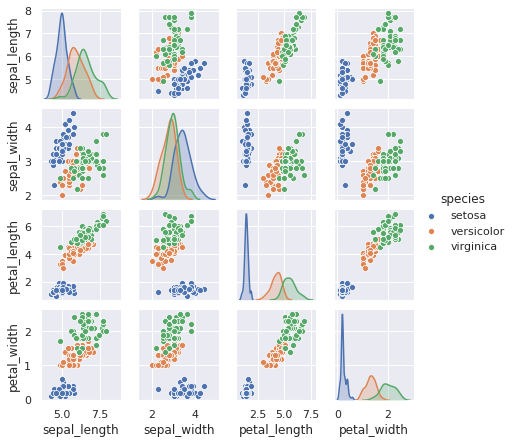

In [4]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## Использование API scikit-learn

- импорт соответствующего класса estimator из библиотеки
- выбор гиперпараметров, создание экземпляра класса
- компоновка данных в матрицу признаков и вектор целей (scikit-learn поддерживает numpy массивы и в некоторых случаях scypy разреженные матрицы. Массивы pandas придется перегнать в numpy)
- обучение методом fit()
- получение прдсказаний для обучения с учителем через метод predict()
- преобразование для обучения без учителя с методом transform() или предсказание (для кластеризации) методом predict()
- fit() и transform() использются так-же для препроцессинга данных

In [7]:
import matplotlib.pyplot as plt
import numpy as np

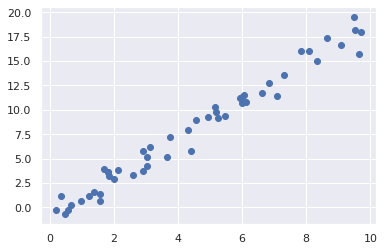

In [8]:
rnd = np.random.RandomState(42)
x = 10 * rnd.rand(50)
y = 2 * x - 1 + rnd.randn(50)
plt.scatter(x, y)

#### Выбор модели

In [9]:
from sklearn.linear_model import LinearRegression

#### Выбор гиперпараметров. Создание экземпляра estimator

подбор точки пересечения с осью координат

In [11]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

#### Подготовка данных


In [12]:
x.shape

(50,)

In [14]:
y.shape

(50,)

In [13]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### Обучение

In [15]:
model.fit(X, y)

LinearRegression()

In [16]:
model.coef_

array([1.9776566])

In [17]:
model.intercept_

-0.9033107255311164

Это угловой коэфициент и точка пересечения с осью координат для нашей модели.

#### Получение предсказаний

создадим новые данные, которыек будем предсказывать

In [22]:
xfit = np.linspace(-1, 11) 

In [23]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

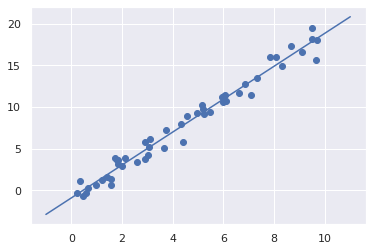

In [24]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Наивный баесовский классификатор для ириса (обучение с учителем)

Предположим, что все распределения в датасете взяты из выровненного по осям координат гаусова распределения. Разделим данные на трейн/тест.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [27]:
# модель
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [29]:
model.fit(Xtrain, ytrain)

GaussianNB()

In [30]:
y_model = model.predict(Xtest)

In [31]:
# точность
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Обучение без учителя (понижение размерности)

Используем PCA для ириса (там 4 признака, снизим до двух измеренеий)

In [33]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

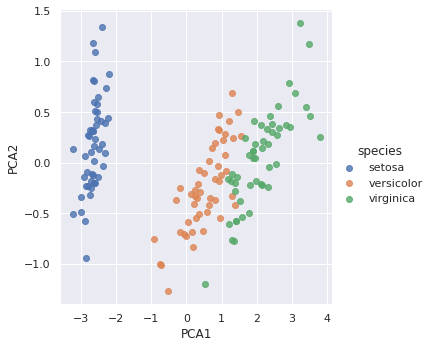

In [36]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

### Обучение без учителя (кластеризация)

Используем GMM (gausian mixture model)

In [37]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')

In [38]:
model.fit(X_iris)

GaussianMixture(n_components=3)

In [39]:
y_gmm = model.predict(X_iris)

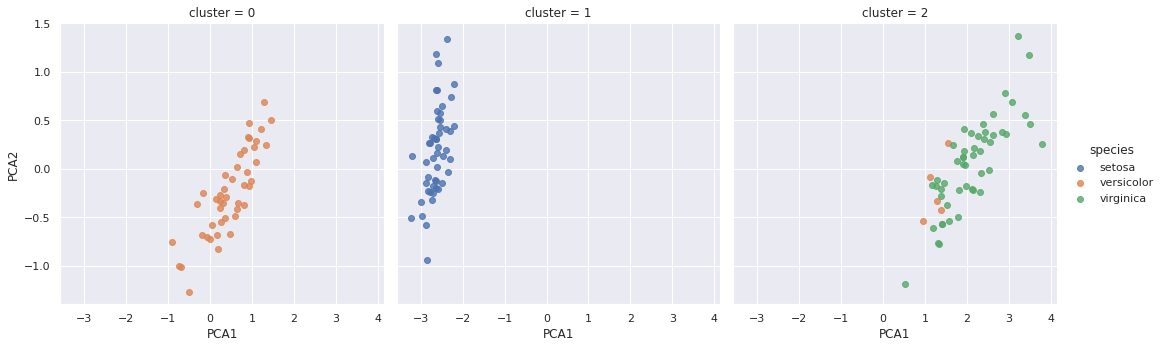

In [40]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, col='cluster', fit_reg=False)